Code to simulate finite system size dynamics for the main script with the mean-field results

In [1]:
from qutip import *
import qutip.piqs as piqs
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 22,        # Axis title
    "axes.labelsize": 20,         # Axis labels
    "xtick.labelsize": 18,        # X-ticks
    "ytick.labelsize": 18,        # Y-ticks
    "legend.fontsize": 18,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

In [3]:
# Parameters
N_A=N_B=1
N=N_A+N_B               # Number of spins
###Original parameters
kappa = 1.0
g = 0.1*kappa
eta = 0.9*g

#Rescaled
Gamma = 4*g**2/kappa
Xi = 2*g*eta/kappa

DeltaA = 0 
DeltaB = 0

ϕ = np.pi/2         # Phase factor


In [4]:

Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)))
Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)))
# Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)))
# Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)))
Jx_A = 1/2 * (Jp_A + Jm_A)
Jy_A = 1/(2j) * (Jp_A - Jm_A)
Jz_A = 1/2 * (Jp_A*Jm_A - Jm_A*Jp_A) 


Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'))#/np.sqrt(2)
Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'))#/np.sqrt(2)
# Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'))#*np.sqrt(2)
# Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'))#*np.sqrt(2)
# Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'))
Jx_B = 1/2 * (Jp_B + Jm_B)
Jy_B = 1/(2j) * (Jp_B - Jm_B)
Jz_B = 1/2 * (Jp_B*Jm_B - Jm_B*Jp_B) 

Jp=Jp_A+Jp_B
Jm=Jm_A+Jm_B
Jx=Jx_A+Jx_B
Jy=Jy_A+Jy_B
Jz=Jz_A+Jz_B

J_sq_A = Jx_A**2 + Jy_A**2 + Jz_A**2
J_sq_B = Jx_B**2 + Jy_B**2 + Jz_B**2
J_sq_total = (Jx_A + Jx_B)**2 + (Jy_A + Jy_B)**2 + (Jz_A + Jz_B)**2


H= - DeltaA * Jz_A - DeltaB * Jz_B + Xi * ( Jm_A  + Jp_A + np.exp(-1j*ϕ) * Jm_B + np.exp(1j*ϕ) * Jp_B)

c_ops=[np.sqrt(Gamma/N)*(Jm_A + np.exp(-1j*ϕ)*Jm_B)]

In [5]:
tim=np.linspace(0,15/(Gamma),2000)

# Initialize both spins as coherent states along +x
psi_A = spin_coherent(N_A, np.pi/2, 0)  # Spin-A: θ=π/2 (x), φ=0
psi_B = spin_coherent(N_B, np.pi/2, 0)  # Spin-B: θ=π/2 (x), φ=0
psi = tensor(psi_A, psi_B)
Rho0 = psi * psi.dag()


##Check if initial state is eigenstate and normalized
print("⟨Jx_A⟩ =", expect(Jx_A, Rho0)) 
print("⟨Jx_B⟩ =", expect(Jx_B, Rho0)) 
print("Norm: ", Rho0.norm()) 


⟨Jx_A⟩ = 0.9999999999999998
⟨Jx_B⟩ = 0.9999999999999998
Norm:  0.9999999999999994


In [6]:
start = time.time()

result0 = mesolve(H, Rho0, tim, c_ops, [Jz_A,Jz_B, Jz, J_sq_A, J_sq_B])

# result0 = mcsolve(H, psi, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), Jz, J_sq_A, J_sq_B], ntraj=500)

end = time.time()
print("Total time taken by mesolve is",end - start)

Total time taken by mesolve is 0.20980072021484375


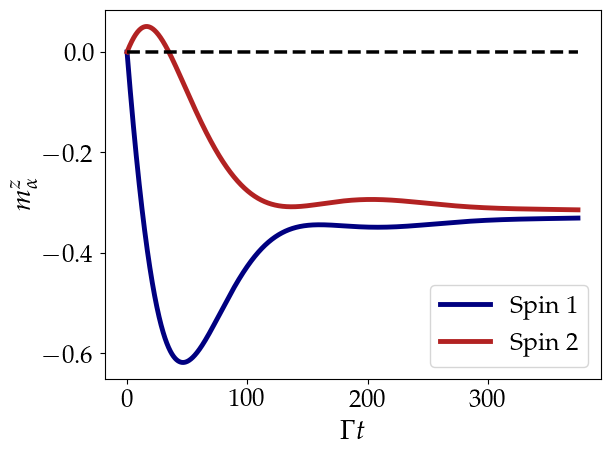

In [7]:
# data_mf1 = np.loadtxt("mf_data1.txt")
# data_mf2 = np.loadtxt("mf_data2.txt")

plt.plot(tim,result0.expect[0]/N_A,label=r'Spin 1', linewidth=3.5, color='navy')
plt.plot(tim,result0.expect[1]/N_B,label=r'Spin 2', linewidth=3.5, color='firebrick')
# plt.plot(tim, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tim, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   
plt.plot(tim,0 *tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\Gamma t$')
plt.legend()
plt.show()

In [534]:
(result0.expect[0]/(N/2))[-1]

np.float64(-0.9971834314546626)

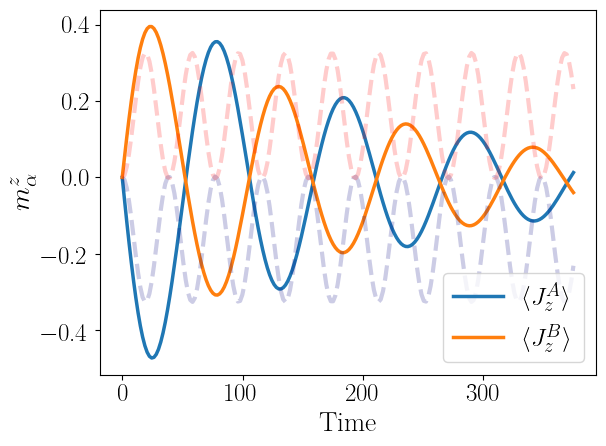

In [ ]:
# # ────────────────────────
# #  PARAMETERS
# # ────────────────────────
# N_A   = 7        # number of TLS in species A
# N_B   = 7        # number of TLS in species B
# N = N_A + N_B  # total number

# ###Original parameters
# kappa = 1.0
# g = 0.1*kappa
# eta = 1.5*g

# #Rescaled
# Gamma = 4*g**2/kappa
# Xi = 2*g*eta/kappa

# DeltaA = 0.1*g 
# DeltaB = 0.1*g

# phi = np.pi         # Phase factor

# # ────────────────────────
# #  COLLECTIVE SPIN OPERATORS 
# # ────────────────────────

# Jx_A, Jy_A, Jz_A = piqs.jspin(N_A)                    
# Jp_A             = piqs.jspin(N_A, "+")
# Jm_A             = piqs.jspin(N_A, "-")

# Jx_B, Jy_B, Jz_B = piqs.jspin(N_B)                    
# Jp_B             = piqs.jspin(N_B, "+")
# Jm_B             = piqs.jspin(N_B, "-")

# # Subspace dimensions
# dimA = Jz_A.shape[0]
# dimB = Jz_B.shape[0]

# # Lift to full tensor product of the two symmetric subspaces
# Jz_A = tensor(Jz_A, qeye(dimB))
# Jp_A = tensor(Jp_A, qeye(dimB))
# Jm_A = tensor(Jm_A, qeye(dimB))
# Jz_B = tensor(qeye(dimA), Jz_B)
# Jp_B = tensor(qeye(dimA), Jp_B)
# Jm_B = tensor(qeye(dimA), Jm_B)

# # ────────────────────────
# #  INITIAL STATE: all spins in +x
# # ────────────────────────
# # spin_coherent(j, θ, φ) builds |θ,φ⟩ for a spin-j: 
# # here j = N/2, θ=π/2, φ=0 ⇒ +x polarization :contentReference[oaicite:2]{index=2}
# rhoA = piqs.css(N_A, x=np.pi/2, y=0, basis='dicke', coordinates='polar')
# rhoB = piqs.css(N_B, x=np.pi/2, y=0, basis='dicke', coordinates='polar')

# rho0 = tensor(rhoA, rhoB)

# # ────────────────────────
# #  HAMILTONIAN
# # ────────────────────────
# drive_A = (Jm_A - Jp_A)
# drive_B = (np.exp(-1j*phi)*Jm_B - np.exp(1j*phi)*Jp_B)
# H = -DeltaA*Jz_A - DeltaB*Jz_B + 1j*Xi*(drive_A + drive_B)

# # ────────────────────────
# #  COLLAPSE OPERATORS
# # ────────────────────────
# # single collective collapse in symmetric basis
# c_ops = [ np.sqrt(Gamma/N_A)*(Jm_A + np.exp(-1j*phi)*Jm_B) ]

# # ────────────────────────
# #  TIME EVOLUTION
# # ────────────────────────
# tlist = np.linspace(0, 15/Gamma, 200)
# # measure ⟨Jz⟩ of each species
# e_ops = [Jz_A, Jz_B]

# result = mesolve(H, rho0, tlist, c_ops, e_ops)

# # ────────────────────────
# #  PLOT
# # ────────────────────────
# data_mf1 = np.loadtxt("mf_data1.txt")
# data_mf2 = np.loadtxt("mf_data2.txt")

# plt.plot(tlist, result.expect[0]/N_A, label=r'$\langle J_z^A\rangle$', lw=2.5)
# plt.plot(tlist, result.expect[1]/N_B, label=r'$\langle J_z^B\rangle$', lw=2.5)
# plt.plot(tlist, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tlist, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   
# plt.xlabel('Time')
# plt.ylabel(r'$m^z_{\alpha}$')
# plt.legend()
# plt.tight_layout()
# plt.show()